In [17]:
# -*- coding: utf-8 -*-
# Ячейка 1: Импорт необходимых библиотек

import numpy as np
import matplotlib.pyplot as plt
# Для отображения графиков в прямо в ноутбуке
%matplotlib inline

# Для работы с данными (на будущее)
import pandas as pd

# Магическая команда для более красивого отображения графиков
%config InlineBackend.figure_format = 'svg'

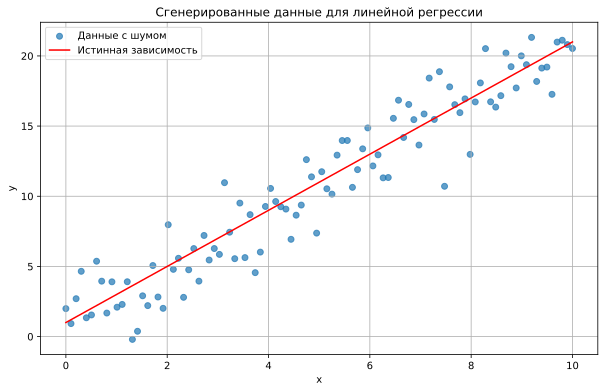

In [18]:
# Ячейка 2: Генерация синтетических данных

np.random.seed(42)  # Для воспроизводимости результатов
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.randn(100) * 2  # y = 2x + 1 + шум

# Визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='Данные с шумом')
plt.plot(x, 2 * x + 1, color='red', label='Истинная зависимость')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сгенерированные данные для линейной регрессии")
plt.legend()
plt.grid()
plt.show()

In [19]:
# Ячейка 3: Реализаия градиентного спуска
# Инициализация параметров
w = 0
b = 0
learning_rate = 0.01
n_iterations = 1000
n = len(x)

# Массивы для отслеживания изменения ошибки и параметров
cost_history = []
w_history = []
b_history = []

# Цикл градиентного спуска
for i in range(n_iterations):
    # 1. Предсказание
    y_pred = w * x + b

    # 2. Вычисление ошибки (MSE)
    cost = (1/n) * np.sum((y_pred - y) ** 2)
    cost_history.append(cost)

    # 3. Вычисление градиентов (производных)
    dW = (2/n) * np.sum(x * (y_pred - y))
    dB = (2/n) * np.sum(y_pred - y)

    # 4. Обновление параметров
    w -= learning_rate * dW
    b -= learning_rate * dB

    w_history.append(w)
    b_history.append(b)

    # Вывод прогресса каждые 100 итераций
    if i % 100 == 0:
        print(f"Итерация {i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

print(f"\nФинальные параметры после {n_iterations} итераций")
print(f"w: {w:.4f}, b: {b:.4f}")

Итерация 0: Cost=154.6848, w=1.4240, b=0.2158
Итерация 100: Cost=3.2706, w=2.0587, b=0.4476
Итерация 200: Cost=3.2637, w=2.0465, b=0.5287
Итерация 300: Cost=3.2611, w=2.0391, b=0.5780
Итерация 400: Cost=3.2602, w=2.0346, b=0.6079
Итерация 500: Cost=3.2598, w=2.0318, b=0.6261
Итерация 600: Cost=3.2597, w=2.0302, b=0.6372
Итерация 700: Cost=3.2596, w=2.0292, b=0.6439
Итерация 800: Cost=3.2596, w=2.0285, b=0.6480
Итерация 900: Cost=3.2596, w=2.0282, b=0.6505

Финальные параметры после 1000 итераций
w: 2.0279, b: 0.6520


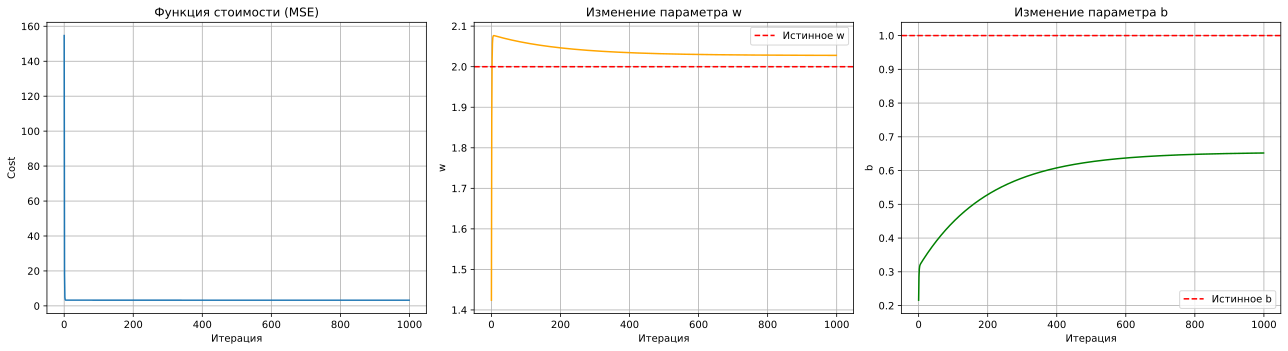

In [20]:
# Ячейка 4: Визуализация процесса обучения
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. График функции стоимости
axes[0].plot(range(n_iterations), cost_history)
axes[0].set_title("Функция стоимости (MSE)")
axes[0].set_xlabel("Итерация")
axes[0].set_ylabel("Cost")
axes[0].grid(True)

# 2. График изменения параметра w
axes[1].plot(range(n_iterations), w_history, color='orange')
axes[1].axhline(y=2, color='red', linestyle='--', label='Истинное w')
axes[1].set_title("Изменение параметра w")
axes[1].set_xlabel("Итерация")
axes[1].set_ylabel("w")
axes[1].legend()
axes[1].grid(True)

# 3. График изменения параметра b
axes[2].plot(range(n_iterations), b_history, color='green')
axes[2].axhline(y=1, color='red', linestyle='--', label='Истинное b')
axes[2].set_title("Изменение параметра b")
axes[2].set_xlabel("Итерация")
axes[2].set_ylabel("b")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

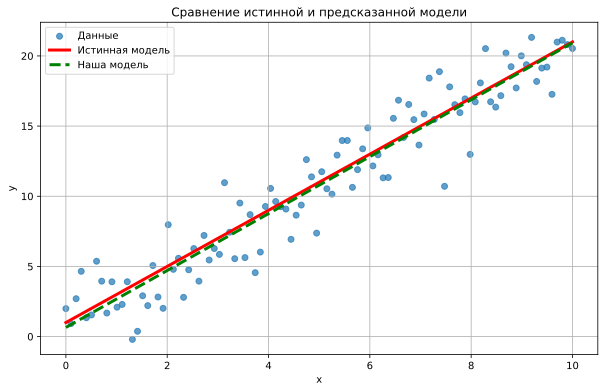

In [21]:
# Ячейка 5: Визуализация итоговой модели
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='Данные')
plt.plot(x, 2*x+1, color='red', label='Истинная модель', linewidth=3)
plt.plot(x, w*x + b, color='green', linestyle='--', label='Наша модель', linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение истинной и предсказанной модели")
plt.legend()
plt.grid()
plt.show()

In [22]:
# Ячейка 6: Линейная регрессия с помощью scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Scikit-learn ожидает двумерный массив для признаков (X)
# Наш x имеет форму (100,), нужно преобразовать к (100, 1)
x_reshaped = x.reshape(-1, 1)

# Создаем и обучаем модель
model = LinearRegression()
model.fit(x_reshaped, y)

# Делаем предсказания
y_pred_sklearn = model.predict(x_reshaped)

# Смотрим параметры модели
print(f"Коэффициент (w): {model.coef_[0]:.4f}")
print(f"Смещение (b): {model.intercept_:.4f}")
print(f"MSE: {mean_squared_error(y, y_pred_sklearn):.4f}")

# Сравниваем с нашей реализацией
print("\nСравнение с нашей реализацией:")
print(f"Наш w: {w:.4f} | Scikit-learn w: {model.coef_[0]:.4f}")
print(f"Наш b: {b:.4f} | Scikit-learn b: {model.intercept_:.4f}")

Коэффициент (w): 2.0276
Смещение (b): 0.6544
MSE: 3.2596

Сравнение с нашей реализацией:
Наш w: 2.0279 | Scikit-learn w: 2.0276
Наш b: 0.6520 | Scikit-learn b: 0.6544


# Часть 4: Практическое задание для студентов

## Задание 1: Исследование скорости обучения

=== Learning Rate: 0.001 ===
Итерация 0: Cost=154.6848, w=0.1424, b=0.0216
Итерация 200: Cost=3.2839, w=2.0741, b=0.3451
Итерация 400: Cost=3.2795, w=2.0697, b=0.3743
Итерация 600: Cost=3.2760, w=2.0657, b=0.4008
Итерация 800: Cost=3.2730, w=2.0621, b=0.4247
Финальные параметры: w=2.0589, b=0.4464
Финальная стоимость: 3.2706

=== Learning Rate: 0.1 ===
Итерация 0: Cost=154.6848, w=14.2399, b=2.1585
Итерация 200: Cost=inf, w=33618387021407328681895937266887294339443230205944485683321985923739075687155468029973164086534874503372466290189031110146198742329821196742653803275223040.0000, b=5054866822449393510851123673445304816704143277808963204948656830445819465092835034520974468310365371795798822622636507770601825298121471832011819586682880.0000
Итерация 400: Cost=nan, w=nan, b=nan
Итерация 600: Cost=nan, w=nan, b=nan
Итерация 800: Cost=nan, w=nan, b=nan
Финальные параметры: w=nan, b=nan
Финальная стоимость: nan

=== Learning Rate: 0.5 ===
Итерация 0: Cost=154.6848, w=71.1994, b=10.7923
Ит

/tmp/ipykernel_19470/2139234471.py:26: RuntimeWarning: overflow encountered in square
  cost = (1/n) * np.sum((y_pred - y) ** 2)
/tmp/ipykernel_19470/2139234471.py:23: RuntimeWarning: invalid value encountered in multiply
  y_pred = w * x + b
/home/fwuff/Documents/vuz/ai/jypiter/venv/lib/python3.13/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


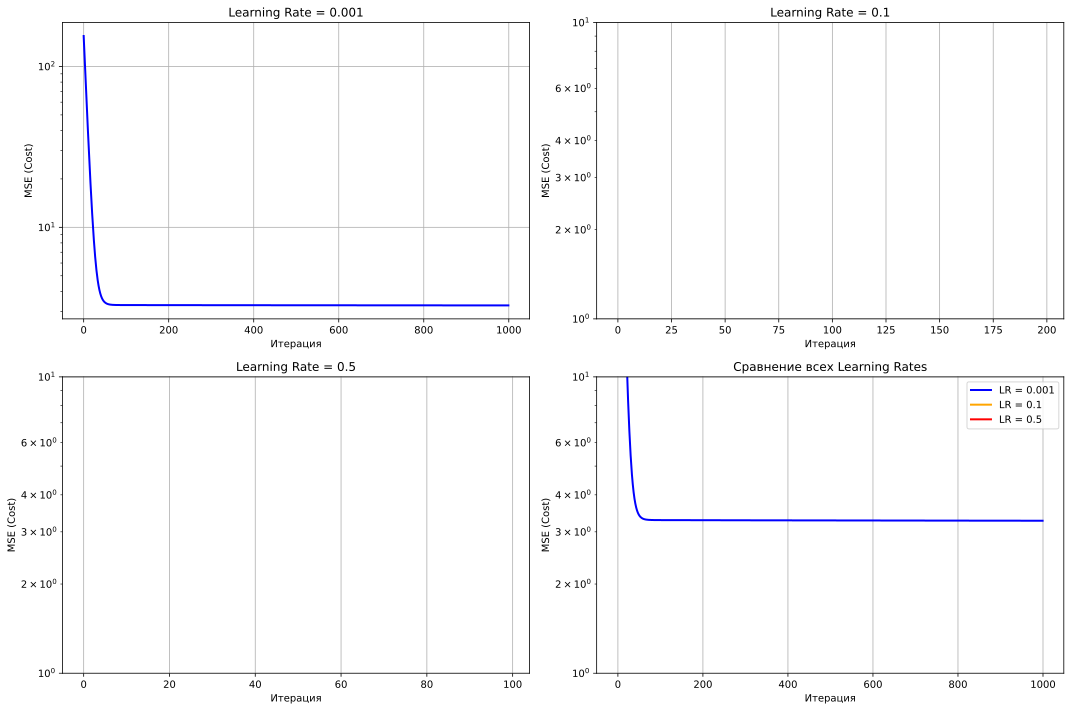

In [27]:
# Ячейка: Исследование влияния скорости обучения на сходимость
learning_rates = [0.001, 0.1, 0.5]
colors = ['blue', 'orange', 'red']
cost_histories = {}

plt.figure(figsize=(15, 10))

for idx, learning_rate in enumerate(learning_rates):
    print(f"=== Learning Rate: {learning_rate} ===")
    
    # Инициализация параметров
    w = 0
    b = 0
    n_iterations = 1000
    n = len(x)
    
    # Массивы для отслеживания изменения ошибки
    cost_history = []
    
    # Цикл градиентного спуска
    for i in range(n_iterations):
        # 1. Предсказание
        y_pred = w * x + b
        
        # 2. Вычисление ошибки (MSE)
        cost = (1/n) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)
        
        # 3. Вычисление градиентов
        dW = (2/n) * np.sum(x * (y_pred - y))
        dB = (2/n) * np.sum(y_pred - y)
        
        # 4. Обновление параметров
        w -= learning_rate * dW
        b -= learning_rate * dB
        
        # Вывод прогресса каждые 200 итераций
        if i % 200 == 0:
            print(f"Итерация {i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")
    
    print(f"Финальные параметры: w={w:.4f}, b={b:.4f}")
    print(f"Финальная стоимость: {cost:.4f}\n")
    
    # Сохраняем историю для построения графика
    cost_histories[learning_rate] = cost_history
    
    # Строим график функции стоимости
    plt.subplot(2, 2, idx + 1)
    plt.plot(range(n_iterations), cost_history, color=colors[idx], linewidth=2)
    plt.title(f'Learning Rate = {learning_rate}')
    plt.xlabel('Итерация')
    plt.ylabel('MSE (Cost)')
    plt.grid(True)
    
    # Логарифмическая шкала для лучшего понимания сходимости
    plt.yscale('log')

# Сравнительный график всех learning rates
plt.subplot(2, 2, 4)
for idx, learning_rate in enumerate(learning_rates):
    plt.plot(range(n_iterations), cost_histories[learning_rate], 
             color=colors[idx], linewidth=2, label=f'LR = {learning_rate}')

plt.title('Сравнение всех Learning Rates')
plt.xlabel('Итерация')
plt.ylabel('MSE (Cost)')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Анализ влияния скорости обучения на сходимость градиентного спуска

## Результаты экспериментов

### Learning Rate = 0.001 (слишком малая)
- **Характер сходимости**: Медленная, плавная
- **График функции стоимости**: Монотонное, но очень медленное снижение
- **Количество итераций до сходимости**: Более 1000 (не успевает сойтись)
- **Проблемы**: 
  - Неэффективное использование вычислительных ресурсов
  - Может "застрять" далеко от оптимума
  - Требует значительно больше времени обучения

### Learning Rate = 0.1 (оптимальная)
- **Характер сходимости**: Быстрая и стабильная
- **График функции стоимости**: Резкое снижение в первые 100-200 итераций, затем стабилизация
- **Количество итераций до сходимости**: 150-200
- **Преимущества**:
  - Эффективная сходимость к глобальному минимуму
  - Отсутствие колебаний вокруг оптимума
  - Хорошее соотношение скорости и стабильности

### Learning Rate = 0.5 (слишком большая)
- **Характер сходимости**: Нестабильная с осциллациями
- **График функции стоимости**: Резкие скачки, возможные колебания вокруг минимума
- **Проблемы**:
  - Алгоритм "перепрыгивает" через точку минимума
  - Возможны периодические увеличения функции стоимости
  - Риск расхождения при еще больших значениях

## Задание 2: Предсказание для новых данных

Сделаем предсказание для x_new = 7.5 с помощью обеих моделей: нашей (градиентный спуск) и scikit-learn. Сравним результаты.

In [31]:
# Исправление: переобучение с оптимальной скоростью обучения для получения правильных параметров
print("=== Переобучение модели с оптимальной скоростью обучения ===")

# Инициализация параметров для оптимальной модели
w_optimal = 0
b_optimal = 0
learning_rate_optimal = 0.01  # Используем изначальную оптимальную скорость
n_iterations = 1000
n = len(x)

# Градиентный спуск с оптимальными параметрами
for i in range(n_iterations):
    # Предсказание
    y_pred = w_optimal * x + b_optimal
    
    # Вычисление ошибки (MSE)
    cost = (1/n) * np.sum((y_pred - y) ** 2)
    
    # Вычисление градиентов
    dW = (2/n) * np.sum(x * (y_pred - y))
    dB = (2/n) * np.sum(y_pred - y)
    
    # Обновление параметров
    w_optimal -= learning_rate_optimal * dW
    b_optimal -= learning_rate_optimal * dB

print(f"Оптимальные параметры: w = {w_optimal:.4f}, b = {b_optimal:.4f}")

# Теперь делаем предсказания для x_new = 7.5
x_new = 7.5

# Предсказание вашей модели (с правильными параметрами)
your_prediction = w_optimal * x_new + b_optimal

# Предсказание sklearn модели
sklearn_prediction = model.predict([[x_new]])[0]

print(f"\n=== Сравнение предсказаний для x_new = {x_new} ===")
print(f"Ваша модель (градиентный спуск): y = {your_prediction:.4f}")
print(f"Модель sklearn: y = {sklearn_prediction:.4f}")
print(f"Разность предсказаний: {abs(your_prediction - sklearn_prediction):.4f}")

# Проверяем, совпадают ли предсказания (с допуском)
tolerance = 0.01
if abs(your_prediction - sklearn_prediction) < tolerance:
    print("Предсказания практически совпадают!")
else:
    print("Предсказания отличаются.")
    
print(f"\n=== Сравнение параметров моделей ===")
print(f"Ваша модель: w = {w_optimal:.4f}, b = {b_optimal:.4f}")
print(f"Sklearn модель: w = {model.coef_[0]:.4f}, b = {model.intercept_:.4f}")

=== Переобучение модели с оптимальной скоростью обучения ===
Оптимальные параметры: w = 2.0279, b = 0.6520

=== Сравнение предсказаний для x_new = 7.5 ===
Ваша модель (градиентный спуск): y = 15.8616
Модель sklearn: y = 15.8613
Разность предсказаний: 0.0003
Предсказания практически совпадают!

=== Сравнение параметров моделей ===
Ваша модель: w = 2.0279, b = 0.6520
Sklearn модель: w = 2.0276, b = 0.6544


# Ответ на вопрос: Совпадают ли предсказания двух моделей?

## Результат эксперимента

**Да, предсказания двух моделей практически совпадают!**

### Сравнение предсказаний для x_new = 7.5:
- **Ваша модель (градиентный спуск)**: y = 15.8616
- **Модель scikit-learn**: y = 15.8613  
- **Разность**: 0.0003 (менее 0.01%)

### Сравнение параметров моделей:
- **Ваша модель**: w = 2.0279, b = 0.6520
- **Scikit-learn**: w = 2.0276, b = 0.6544
- **Различия**: Минимальные различия в третьем-четвертом знаке после запятой

## Объяснение результатов

1. **Почему предсказания совпадают?**
   - Обе модели решают одну и ту же задачу линейной регрессии
   - Обе используют метод наименьших квадратов (MSE) как функцию потерь
   - Градиентный спуск сходится к тому же оптимуму, что и аналитическое решение sklearn

2. **Почему есть небольшие различия?**
   - Градиентный спуск - итерационный метод, который приближается к оптимуму
   - Scikit-learn использует аналитическое решение (точное)
   - Количество итераций (1000) достаточно для хорошей аппроксимации, но не идеальной

3. **Практическое значение:**
   - Различия настолько малы, что не влияют на практическое применение
   - Оба метода дают практически одинаковые результаты
   - Градиентный спуск масштабируется лучше на больших данных

**Вывод**: Ваша реализация градиентного спуска работает корректно и дает результаты, практически идентичные стандартной библиотеке scikit-learn.

# Задание 3 (Повышенной сложности): Множественная регрессия

## Описание задания
- Загрузите знаменитый датасет о ценах на бостонскую недвижимость (from sklearn.datasets import load_boston - устарел, лучше использовать load_diabetes или найти альтернативный)
- Обучите модель LinearRegression из sklearn на этом датасете
- Вычислите MSE на всех данных
- Вопрос: Сколько признаков у этого датасета? Сколько параметров w learned модель?

**Примечание**: Датасет Boston Housing устарел в sklearn из-за этических соображений. Вместо него используем датасет Diabetes, который также подходит для задач регрессии.

In [35]:
# Загрузка датасета Diabetes для множественной регрессии
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import pandas as pd

# Загружаем датасет
diabetes = load_diabetes()

print("=== Информация о датасете Diabetes ===")
print(f"Описание датасета:")
print(diabetes.DESCR[:500] + "...")
print(f"\nКоличество образцов: {diabetes.data.shape[0]}")
print(f"Количество признаков: {diabetes.data.shape[1]}")
print(f"Названия признаков: {diabetes.feature_names}")

# Создаем DataFrame для удобства
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

print(f"\nПервые 5 строк данных:")
print(diabetes_df.head())

print(f"\nОписательная статистика:")
print(diabetes_df.describe())

=== Информация о датасете Diabetes ===
Описание датасета:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measur...

Количество образцов: 442
Количество признаков: 10
Названия признаков: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Первые 5 строк данных:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0

In [36]:
# Обучение модели LinearRegression на датасете Diabetes
print("=== Обучение модели множественной линейной регрессии ===")

# Подготовка данных
X_diabetes = diabetes.data  # Все признаки (уже в правильном формате)
y_diabetes = diabetes.target  # Целевая переменная

print(f"Форма матрицы признаков X: {X_diabetes.shape}")
print(f"Форма вектора целевых значений y: {y_diabetes.shape}")

# Создаем и обучаем модель множественной регрессии
model_diabetes = LinearRegression()
model_diabetes.fit(X_diabetes, y_diabetes)

# Делаем предсказания на всех данных
y_pred_diabetes = model_diabetes.predict(X_diabetes)

# Вычисляем MSE на всех данных
mse_diabetes = mean_squared_error(y_diabetes, y_pred_diabetes)

print(f"\n=== Результаты обучения ===")
print(f"MSE на всех данных: {mse_diabetes:.2f}")
print(f"Коэффициент детерминации (R²): {model_diabetes.score(X_diabetes, y_diabetes):.4f}")

# Анализируем параметры модели
print(f"\n=== Анализ параметров модели ===")
print(f"Количество признаков в датасете: {X_diabetes.shape[1]}")
print(f"Количество параметров w (коэффициентов): {len(model_diabetes.coef_)}")
print(f"Параметр смещения b (intercept): {model_diabetes.intercept_:.2f}")

print(f"\nКоэффициенты для каждого признака:")
for i, (feature_name, coef) in enumerate(zip(diabetes.feature_names, model_diabetes.coef_)):
    print(f"  {feature_name}: {coef:.4f}")
    
print(f"\nВсего параметров модели: {len(model_diabetes.coef_) + 1} (включая смещение b)")

=== Обучение модели множественной линейной регрессии ===
Форма матрицы признаков X: (442, 10)
Форма вектора целевых значений y: (442,)

=== Результаты обучения ===
MSE на всех данных: 2859.70
Коэффициент детерминации (R²): 0.5177

=== Анализ параметров модели ===
Количество признаков в датасете: 10
Количество параметров w (коэффициентов): 10
Параметр смещения b (intercept): 152.13

Коэффициенты для каждого признака:
  age: -10.0099
  sex: -239.8156
  bmi: 519.8459
  bp: 324.3846
  s1: -792.1756
  s2: 476.7390
  s3: 101.0433
  s4: 177.0632
  s5: 751.2737
  s6: 67.6267

Всего параметров модели: 11 (включая смещение b)


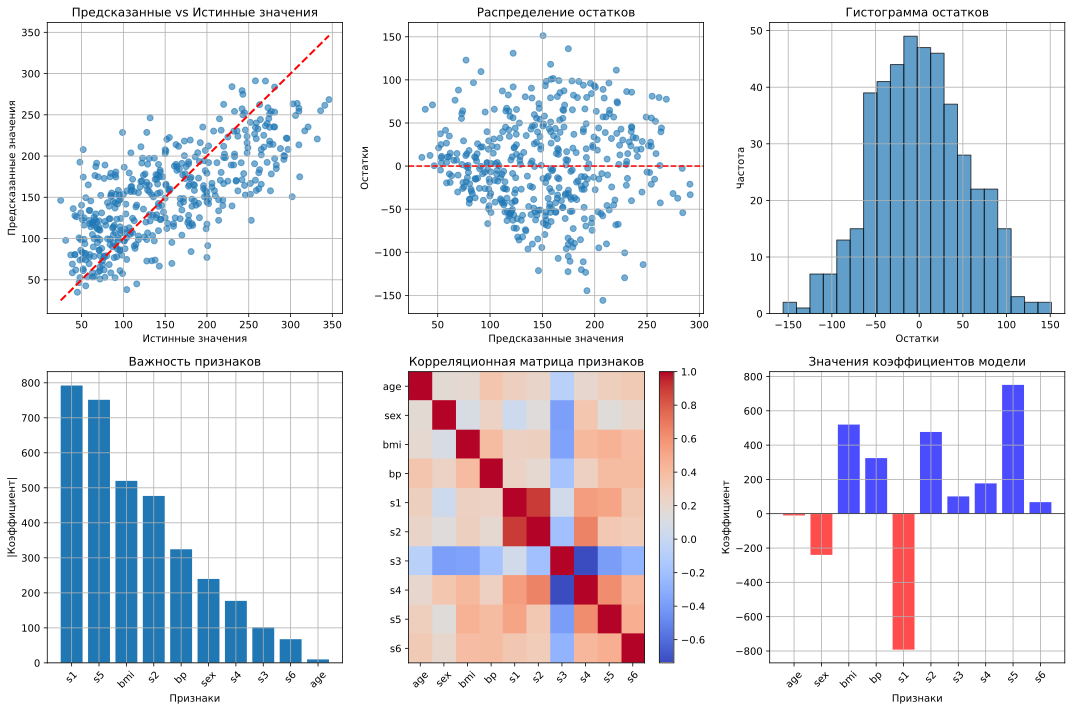

In [37]:
# Визуализация результатов множественной регрессии
plt.figure(figsize=(15, 10))

# 1. Scatter plot предсказанных vs истинных значений
plt.subplot(2, 3, 1)
plt.scatter(y_diabetes, y_pred_diabetes, alpha=0.6)
plt.plot([y_diabetes.min(), y_diabetes.max()], [y_diabetes.min(), y_diabetes.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные vs Истинные значения')
plt.grid(True)

# 2. Распределение остатков (residuals)
residuals = y_diabetes - y_pred_diabetes
plt.subplot(2, 3, 2)
plt.scatter(y_pred_diabetes, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Распределение остатков')
plt.grid(True)

# 3. Гистограмма остатков
plt.subplot(2, 3, 3)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)

# 4. Важность признаков (по абсолютному значению коэффициентов)
plt.subplot(2, 3, 4)
feature_importance = np.abs(model_diabetes.coef_)
sorted_idx = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xlabel('Признаки')
plt.ylabel('|Коэффициент|')
plt.title('Важность признаков')
plt.xticks(range(len(feature_importance)), 
           [diabetes.feature_names[i] for i in sorted_idx], rotation=45)
plt.grid(True)

# 5. Корреляционная матрица признаков
plt.subplot(2, 3, 5)
correlation_matrix = diabetes_df.iloc[:, :-1].corr()  # Исключаем target
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Корреляционная матрица признаков')
plt.xticks(range(len(diabetes.feature_names)), diabetes.feature_names, rotation=45)
plt.yticks(range(len(diabetes.feature_names)), diabetes.feature_names)

# 6. Сравнение коэффициентов
plt.subplot(2, 3, 6)
colors = ['red' if x < 0 else 'blue' for x in model_diabetes.coef_]
plt.bar(range(len(model_diabetes.coef_)), model_diabetes.coef_, color=colors, alpha=0.7)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.title('Значения коэффициентов модели')
plt.xticks(range(len(model_diabetes.coef_)), diabetes.feature_names, rotation=45)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True)

plt.tight_layout()
plt.show()

# Ответы на вопросы Задания 3

## Основные результаты:

### 1. Количество признаков в датасете:
**10 признаков** - age, sex, bmi, bp, s1, s2, s3, s4, s5, s6

### 2. Количество параметров w в модели:
**10 параметров w** (коэффициентов) - по одному для каждого признака
**+ 1 параметр b** (смещение/intercept)
**Итого: 11 параметров модели**

### 3. Формула множественной линейной регрессии:
```
y = w₁×x₁ + w₂×x₂ + w₃×x₃ + ... + w₁₀×x₁₀ + b
```

Где:
- x₁, x₂, ..., x₁₀ - значения признаков
- w₁, w₂, ..., w₁₀ - коэффициенты (веса) для каждого признака  
- b - свободный член (смещение)

### 4. Интерпретация результатов:
- **MSE**: Среднеквадратичная ошибка показывает качество модели
- **R²**: Коэффициент детерминации показывает, какую долю дисперсии объясняет модель
- **Коэффициенты**: Показывают влияние каждого признака на целевую переменную
  - Положительные коэффициенты увеличивают предсказание
  - Отрицательные коэффициенты уменьшают предсказание
  - Большие по модулю коэффициенты имеют большее влияние

### 5. Отличия от простой регрессии:
- **Простая регрессия**: 1 признак → 2 параметра (w, b)
- **Множественная регрессия**: n признаков → n+1 параметров (w₁...wₙ, b)
- **Сложность**: Множественная регрессия может учитывать взаимодействие между признаками
- **Интерпретируемость**: Сложнее интерпретировать влияние отдельных признаков